In [373]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import *
from sklearn.metrics import *
import numpy as np
import matplotlib.pyplot as plt


In [374]:
player_dataset = pd.read_csv("Player_Dataset_With_Averages.csv")

In [375]:
player_dataset.describe()

,Unnamed: 0,Unnamed: 0.1,player_id,combine_player_ids,season_played,passing_attempts,passing_completions,passing_yards,passing_rating,passing_touchdowns,...,age,arm,40_dash,vertical,bench,shuttle,broad,3_cone,60_shuttle,wonderlic
count,6358.000000,6358.000000,6358.000000,6.358000e+03,6358.000000,6358.000000,6358.000000,6358.000000,6358.000000,6358.000000,...,6358.000000,6358.000000,6358.000000,6358.000000,6358.000000,6358.000000,6358.000000,6358.000000,6358.000000,229.000000
mean,3178.500000,12579.029726,12587.377477,2.002169e+07,4.943221,27.229475,45.995124,316.650991,138.121312,1.850582,...,22.730900,32.306568,4.803059,32.391942,19.475564,4.378500,112.983794,7.318844,11.678334,24.318777
std,1835.540838,7265.493453,7419.721510,8.979613e+04,3.611164,255.695247,419.954076,2988.836848,1144.448719,18.643978,...,0.829719,1.198946,0.299106,4.008129,6.020158,0.244671,8.784472,0.388337,0.245006,7.645010
min,0.000000,0.000000,5.000000,1.987000e+07,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,...,19.523288,27.130000,4.210000,19.000000,1.000000,3.730000,8.000000,6.380000,10.580000,4.000000
25%,1589.250000,6242.750000,6115.250000,1.994020e+07,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,22.197260,31.422028,4.567580,29.500000,14.915584,4.200000,107.000000,7.042195,11.497068,20.000000
50%,3178.500000,12528.500000,12133.000000,2.002021e+07,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,22.739726,32.250000,4.730000,32.581967,19.000000,4.320000,114.000000,7.245244,11.620000,24.000000
75%,4767.750000,18819.500000,19250.500000,2.010023e+07,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,23.246575,33.423852,5.010000,35.000000,23.160000,4.530000,118.973180,7.540000,11.871250,29.000000
max,6357.000000,25039.000000,25040.000000,2.019047e+07,21.000000,6774.000000,10407.000000,79279.000000,28185.300000,579.000000,...,28.553425,38.500000,5.850000,46.000000,49.000000,5.400000,147.000000,9.280000,13.340000,48.000000


In [376]:
draft_df  = pd.read_csv("Data_Cleaning/draft_AV_table_60_21_College.csv")

In [377]:
total_player_with_av = pd.merge(player_dataset, draft_df, left_on = ["name", "position", "college"], right_on = ["Player", "Pos", "College/Univ"], how='left')

In [378]:
total_player_with_av["Missing"] = total_player_with_av["Player"].isna()

In [379]:
total_player_with_av.describe()

,Unnamed: 0_x,Unnamed: 0.1,player_id,combine_player_ids,season_played,passing_attempts,passing_completions,passing_yards,passing_rating,passing_touchdowns,...,60_shuttle,wonderlic,Unnamed: 0_y,To,CarAV,DrAV,Age,Rnd,Pick,Year
count,6362.000000,6362.000000,6362.000000,6.362000e+03,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,...,6362.000000,231.000000,3651.000000,3637.000000,3637.000000,3275.000000,3648.000000,3651.000000,3651.000000,3651.000000
mean,3177.825055,12576.360421,12588.691921,2.002168e+07,4.947972,27.212355,45.966206,316.451902,138.034470,1.849418,...,11.678276,24.341991,14328.120241,2006.147924,18.604069,14.060153,22.535636,4.070666,113.782799,2001.191180
std,1835.600340,7265.719051,7417.952203,8.978522e+04,3.616670,255.615751,419.823598,2987.907506,1144.094069,18.638173,...,0.245102,7.615768,2662.527736,9.916683,22.255640,18.130703,0.852321,2.302457,72.272060,9.468659
min,0.000000,0.000000,5.000000,1.987000e+07,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,...,10.580000,4.000000,44.000000,1960.000000,-4.000000,-4.000000,20.000000,1.000000,1.000000,1960.000000
25%,1588.250000,6228.250000,6123.000000,1.994020e+07,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.497068,20.000000,12575.500000,1999.000000,2.000000,2.000000,22.000000,2.000000,53.000000,1994.000000
50%,3177.500000,12526.500000,12136.000000,2.002021e+07,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.620000,25.000000,14534.000000,2007.000000,9.000000,7.000000,23.000000,4.000000,105.000000,2002.000000
75%,4767.750000,18819.500000,19246.000000,2.010023e+07,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.871250,29.000000,16371.500000,2014.000000,28.000000,19.000000,23.000000,6.000000,167.000000,2009.000000
max,6357.000000,25039.000000,25040.000000,2.019047e+07,21.000000,6774.000000,10407.000000,79279.000000,28185.300000,579.000000,...,13.340000,48.000000,19381.000000,2021.000000,167.000000,141.000000,28.000000,20.000000,431.000000,2020.000000


In [380]:
print(np.sum(total_player_with_av["Missing"]), np.count_nonzero(total_player_with_av["Missing"]), total_player_with_av["Missing"].size)

2711 2711 6362


In [381]:
# Load Dataset 
input = total_player_with_av
#features_cav=['season_played', 'Age', 'Pick', 'passing_touchdowns', 'defense_tackles', 'receiving_yards', 'defense_sacks', 'defense_interceptions', 'rushing_yards', 'weights', 'rushing_attempts', 'Rnd', 'receiving_yards_average', 'receiving_touchdowns', 'age', 'hands', 'rushing_touchdowns', 'receiving_receptions', 'passing_sacks_yards_lost', 'passing_rating', 'passing_yards', 'passing_interceptions', 'heights', 'passing_attempts', 'rushing_touchdowns_average', 'punt_return_yards', 'receiving_touchdowns_average', 'passing_sacks_average', 'passing_touchdowns_average', 'field_goal_makes_average', 'defense_tackle_assists', 'passing_sacks', 'punt_return_attempts_average', 'passing_completions']
#features_dav= ['season_played', 'Age', 'Pick', 'defense_tackles', 'receiving_yards_average', 'defense_sacks', 'passing_sacks_yards_lost', 'defense_interceptions', 'weights', 'rushing_yards', 'rushing_attempts', 'Rnd', 'receiving_yards', 'hands', 'age', 'passing_interceptions', 'passing_yards', 'passing_rating', 'rushing_yards_average', 'receiving targets', 'receiving_touchdowns', 'passing_touchdowns_average', 'passing_sacks_average', 'passing_touchdowns', '3_cone', 'vertical', 'defense_tackle_assists', 'defense_sacks_average', 'heights', 'passing_completions', 'defense_interceptions_average', 'receiving_touchdowns_average']

input.to_csv("merge_with_average.csv")

features_cav = ["age", "40_dash", "vertical", "broad", '3_cone', "CarAV"]

print(input.shape, "Before")

input_cav= input[input[features_cav].notnull().all(axis=1)]

print(input_cav.shape, "After")

input_cav["TopAV"] = np.where(input_cav["CarAV"] >= 9, 1, 0)

final_features = ["age", "40_dash", "vertical", "broad", '3_cone',"bench"]

X=input_cav[final_features]
#print(input_cav)

y = input_cav['TopAV']
#print(X)
#16715


(6362, 104) Before
(3637, 104) After


<ipython-input-381-2aedab49ab97>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_cav["TopAV"] = np.where(input_cav["CarAV"] >= 9, 1, 0)


In [382]:
input_cav.head()

,Unnamed: 0_x,Unnamed: 0.1,player_id,name,position,college,combine_player_ids,season_played,passing_attempts,passing_completions,...,CarAV,DrAV,Age,Tm,Rnd,Pick,Year,College/Univ,Missing,TopAV
0,0,0,1809,Robert Blackmon,DB,Baylor,19900034,9,0,0,...,45.0,39.0,23.0,SEA,2.0,34.0,1990.0,Baylor,False,1
1,1,1,23586,Dean Wells,LB,Kentucky,19930085,9,0,0,...,33.0,20.0,23.0,SEA,4.0,85.0,1993.0,Kentucky,False,1
2,2,5,4310,Jerome Collins,TE,Notre Dame,20050144,1,0,0,...,0.0,0.0,23.0,STL,5.0,144.0,2005.0,Notre Dame,False,0
4,4,8,11755,LaMont Jordan,RB,Maryland,20010049,9,0,2,...,30.0,11.0,22.0,NYJ,2.0,49.0,2001.0,Maryland,False,1
5,5,13,3966,Frank Clark,DE,Michigan,20150063,3,0,0,...,38.0,20.0,22.0,SEA,2.0,63.0,2015.0,Michigan,False,1


In [383]:
X.head()

,age,40_dash,vertical,broad,3_cone,bench
0,22.961644,4.59,33.500000,119.000000,7.042195,12.0
1,22.780822,4.61,39.000000,126.000000,7.245244,20.0
2,22.695890,4.73,28.013834,114.000000,7.870920,21.0
4,22.457534,4.57,37.000000,116.376673,7.146617,24.0
5,21.890411,4.79,38.500000,118.000000,7.080000,19.0


In [384]:
##Validation

Xval = X.values

print(Xval)
print(len(Xval))
yval = y.values
print(yval)
print(len(yval))
X_train, X_validation, Y_train, Y_validation = train_test_split(Xval, yval, test_size=0.20, random_state=1)


[[ 22.96164384   4.59        33.5        119.           7.04219512
   12.        ]
 [ 22.78082192   4.61        39.         126.           7.2452439
   20.        ]
 [ 22.69589041   4.73        28.01383399 114.           7.87092024
   21.        ]
 ...
 [ 21.9369863    4.62        32.         117.           7.34
   16.        ]
 [ 23.62739726   4.81        35.5        118.           7.21
   16.        ]
 [ 23.46027397   4.84        29.5        110.           7.6
   18.69061876]]
3637
[1 1 0 ... 1 0 1]
3637


In [385]:
##Model

model=LogisticRegression(solver='liblinear',multi_class='ovr')
kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

In [386]:
print(cv_results)

[0.5790378  0.59278351 0.59965636 0.54810997 0.59724613]


In [387]:
model = model.fit(X_train, Y_train)
ypred = model.predict(X)
y_probs = model.predict_proba(X)
#print(ypred)


In [388]:
model.score(X_validation, Y_validation)

0.5906593406593407

In [389]:
print(y.shape, ypred.shape, y_probs.shape)

(3637,) (3637,) (3637, 2)


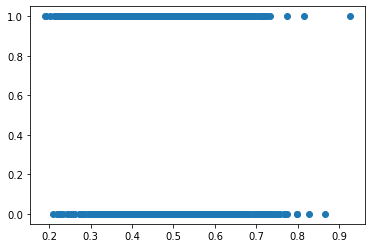

In [390]:
plt.scatter(y_probs[:,0], y)

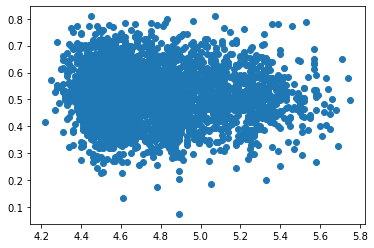

In [391]:
plt.scatter(X["40_dash"], y_probs[:,1])

In [392]:
model.coef_

array([[-0.39820783,  0.47990503,  0.04386987,  0.01779016,  0.231647  ,
         0.02562294]])

In [393]:
model.classes_

array([0, 1])

In [394]:
print("R2 score:", r2_score(y, ypred))
#acc = sklearn.metrics.accuracy_score(yval, ypred, normalize = True)
print("Accuracy score:", accuracy_score(y, ypred))
#ROC score
#roc = sklearn.metrics.roc_auc_score(yval, Y_train)
print("ROC score:",roc_auc_score(y,ypred))
#precision, recall, f1
#f1 = sklearn.metrics.f1_score(yval, ypred)
print("F1 score:",f1_score(y,ypred))

#prec = sklearn.metrics.precision_score(yval, ypred)
print("Precision score:",precision_score(y,ypred))
#recall = sklearn.metrics.recall_score(yval, ypred)
print("Recall Score:",recall_score(y,ypred))

R2 score: -0.6457282733730589
Accuracy score: 0.5892218861699202
ROC score: 0.5868112534020498
F1 score: 0.6210045662100457
Precision score: 0.5967820575329108
Recall Score: 0.6472765732416711


In [395]:
import sklearn.metrics as metrics
#https://medium.com/@oluwabukunmige/logistic-regression-in-scikit-learn-a-step-by-step-process-32f546241f32

In [396]:
fpr, tpr, treshold = metrics.roc_curve(y, y_probs[:,1])
roc_auc = metrics.auc(fpr, tpr)

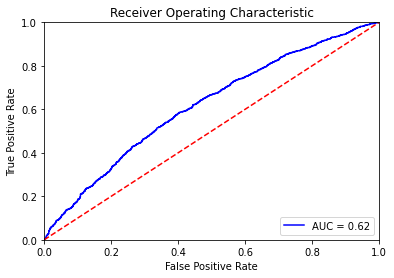

In [397]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [398]:
from sklearn.metrics import classification_report
print(classification_report(y, ypred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.58      0.53      0.55      1746
           1       0.60      0.65      0.62      1891

    accuracy                           0.59      3637
   macro avg       0.59      0.59      0.59      3637
weighted avg       0.59      0.59      0.59      3637



In [399]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
confusion = confusion_matrix(y, ypred)
confusion

#Confusion Matrix: [[True Positive, False Positive],
#                   [False Negative, True Negative]]

array([[ 919,  827],
       [ 667, 1224]], dtype=int64)